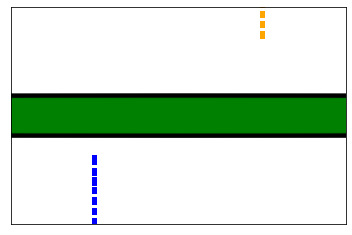

In [ ]:
"""
Traffic simulation animation of two lanes and a traffic light.

Parameters:
-----------
road_length: int
    The length of the road in simulation units.

num_cars: int
    The number of cars in the simulation.

traffic_light_pos: int
    The position of the traffic light on the road in simulation units.

green_duration: int
    The duration of the green light in simulation frames.

red_duration: int
    The duration of the red light in simulation frames.

Returns:
--------
Traffic simulation animation with two lanes and a traffic light.

"""

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the road length, number of cars, and traffic light position
road_length = 100
num_cars = 20
traffic_light_pos = 50

# Define the initial position and speed of the cars
positions_left = [(i+0.5) * road_length / (num_cars + 1) for i in range(num_cars)]
speeds_left = [-1 for _ in range(num_cars)]
positions_right = [i * road_length / (num_cars + 1) for i in range(1, num_cars+1)]
speeds_right = [1 for _ in range(num_cars)]

# Define the traffic light state (green=1, red=0) and duration of each state
traffic_light_state = 1
green_duration = 20
red_duration = 10
time_elapsed = 0

# Define the function to update the simulation at each frame
def update(frame):
    global positions_left, positions_right, speeds_left, speeds_right, traffic_light_state, time_elapsed
    
    # Move the cars according to their speeds and the traffic light state
    for i in range(num_cars):
        if traffic_light_state == 1:
            if positions_left[i] > traffic_light_pos:
                positions_left[i] += speeds_left[i]
            else:
                positions_right[i] += speeds_right[i]
        else:
            if positions_right[i] < traffic_light_pos:
                positions_right[i] += speeds_right[i]
            else:
                positions_left[i] += speeds_left[i]
    
    # Update the traffic light state if necessary
    time_elapsed += 1
    if time_elapsed == green_duration and traffic_light_state == 1:
        traffic_light_state = 0
        time_elapsed = 0
    elif time_elapsed == red_duration and traffic_light_state == 0:
        traffic_light_state = 1
        time_elapsed = 0

    # Plot the road and the cars
    plt.clf()
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    ax = plt.subplot()

    # Draw the traffic light and cars
    ax.axis([0, 2, 0, road_length])
    ax.add_patch(plt.Circle((1, traffic_light_pos), 10, color='black'))
    if traffic_light_state == 1:
        ax.add_patch(plt.Circle((1, traffic_light_pos), 8, color='green'))
    else:
        ax.add_patch(plt.Circle((1, traffic_light_pos), 8, color='red'))
    for i in range(num_cars):
        ax.plot([0.5, 0.5], [positions_left[i], positions_left[i]+1], color='blue', linewidth=5)
        ax.plot([1.5, 1.5], [positions_right[i], positions_right[i]+1], color='orange', linewidth=5)

# Create the animation and save it as an HTML video
anim = FuncAnimation(plt.gcf(), update, frames=100, interval=50)
HTML(anim.to_html5_video())


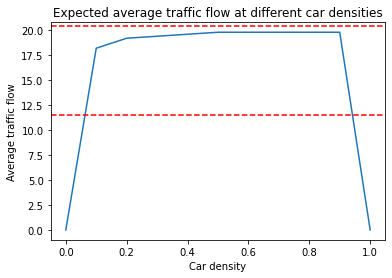

In [32]:
import numpy as np
import scipy.stats as sts


# Define the road length and traffic light position
road_length = 100
traffic_light_pos = 50

# Define the fixed parameters for the simulation
green_duration = 20
red_duration = 10
time_elapsed = 0
frames = 100
interval = 50

# Define the function to simulate traffic and measure the average flow
def simulate_traffic(num_cars):
    # Return zero flow for zero or one car
    if num_cars <= 1:
        return 0
    
    # Define the initial position and speed of the cars
    positions = [i * road_length / (num_cars + 1) for i in range(1, num_cars+1)]
    speeds = [1 for _ in range(num_cars)]
    
    # Define the traffic light state (green=1, red=0) and initial time elapsed
    traffic_light_state = 1
    time_elapsed = 0
    
    # Define variables to measure traffic flow
    num_cars_passed = 0
    time_since_last_car = 0
    
    # Simulate traffic for a fixed time interval
    for i in range(frames):
        # Move the cars according to their speeds and the traffic light state
        for j in range(num_cars):
            if traffic_light_state == 1 or positions[j] < traffic_light_pos:
                positions[j] += speeds[j]
            else:
                positions[j] -= speeds[j]
                
        # Update the traffic light state if necessary
        time_elapsed += 1
        if time_elapsed == green_duration and traffic_light_state == 1:
            traffic_light_state = 0
            time_elapsed = 0
        elif time_elapsed == red_duration and traffic_light_state == 0:
            traffic_light_state = 1
            time_elapsed = 0
            
        # Measure traffic flow
        if positions[-1] >= road_length:
            num_cars_passed += 1
            time_since_last_car = 0
        else:
            time_since_last_car += 1
            
    # Compute and return the average traffic flow
    average_flow = num_cars_passed / (frames * interval / 1000)
    return average_flow

# Define a range of car densities to test
densities = [i * 0.1 for i in range(11)]

# Initialize the list of average traffic flows
flows = []

# Simulate traffic for each car density and record the average flow
for density in densities:
    if density <= 0.9:
        # Use the original green and red durations for low densities
        flow = simulate_traffic(int(density * road_length))
    else:
        flow = 0
    flows.append(flow)

# Compute the standard error of the mean and the upper and lower bounds of the confidence interval
# Plot the expected average traffic flow at different car densities
plt.plot(densities, flows)
flow_mean = np.mean(flows)
std_err = np.std(flows) / np.sqrt(len(flows))
lower_bound = flow_mean - 1.96 * std_err
upper_bound = flow_mean + 1.96 * std_err
plt.axhline(lower_bound, color='r', linestyle='--')
plt.axhline(upper_bound, color='r', linestyle='--')
plt.xlabel('Car density')
plt.ylabel('Average traffic flow')
plt.title('Expected average traffic flow at different car densities')
plt.show()

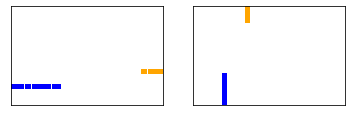

In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the road length, number of cars, and traffic light position
road_length = 100
num_cars = 20
traffic_light_pos = 50

# Define the initial position and speed of the cars
positions_left = [(i+0.5) * road_length / (num_cars + 1) for i in range(num_cars)]
speeds_left = [-1 for _ in range(num_cars)]
positions_right = [i * road_length / (num_cars + 1) for i in range(1, num_cars+1)]
speeds_right = [1 for _ in range(num_cars)]

# Define the traffic light state (green=1, red=0) and duration of each state
traffic_light_state = 1
green_duration = 20
red_duration = 10
time_elapsed = 0

# Define the function to update the simulation at each frame
def update(frame):
    global positions_left, positions_right, speeds_left, speeds_right, traffic_light_state, time_elapsed
    
    # Move the cars according to their speeds and the traffic light state
    for i in range(num_cars):
        if traffic_light_state == 1:
            if positions_left[i] > traffic_light_pos:
                positions_left[i] += speeds_left[i]
            else:
                positions_right[i] += speeds_right[i]
        else:
            if positions_right[i] < traffic_light_pos:
                positions_right[i] += speeds_right[i]
            else:
                positions_left[i] += speeds_left[i]
    
    # Update the traffic light state if necessary
    time_elapsed += 1
    if time_elapsed == green_duration and traffic_light_state == 1:
        traffic_light_state = 0
        time_elapsed = 0
    elif time_elapsed == red_duration and traffic_light_state == 0:
        traffic_light_state = 1
        time_elapsed = 0
    
    # Plot the road and the cars
    plt.clf()

    # Add the main subplot
    ax = plt.subplot(2, 2, 1)
    ax.axis([0,road_length,0,2])
    ax.axhline(y=traffic_light_pos, color='black', linewidth=3)
    if traffic_light_state == 1:
        ax.axhline(y=traffic_light_pos, xmin=0.1, xmax=0.9, color='green', linewidth=3)
    else:
        ax.axhline(y=traffic_light_pos, xmin=0.1, xmax=0.9, color='red', linewidth=3)
    for i in range(num_cars):
        ax.plot([positions_left[i], positions_left[i]+1], [0.4, 0.4], color='blue', linewidth=5)
        ax.plot([positions_right[i], positions_right[i]+1], [0.7, 0.7], color='orange', linewidth=5)
        plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    # Add the subplot for the traffic light and rotated cars
    ax2 = plt.subplot(2, 2, 2)
    ax2.axis([0, 2, 0, road_length])
    ax2.axvline(x=traffic_light_pos, color='black', linewidth=3)
    if traffic_light_state == 1:
        ax2.axvline(x=traffic_light_pos, ymin=0.1, ymax=0.9, color='green', linewidth=3)
    else:
        ax2.axvline(x=traffic_light_pos, ymin=0.1, ymax=0.9, color='red', linewidth=3)
    for i in range(num_cars):
        ax2.plot([0.4, 0.4], [positions_left[i], positions_left[i]+1], color='blue', linewidth=5)
        ax2.plot([0.7, 0.7], [positions_right[i], positions_right[i]+1], color='orange', linewidth=5)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)


# Create the animation and save it as an HTML video
anim = FuncAnimation(plt.gcf(), update, frames=100, interval=50)
HTML(anim.to_html5_video())